## OCR 익스 


In [91]:
import keras_ocr
import pytesseract
import os 
import matplotlib.pyplot as plt
import cv2 
print(keras_ocr.__version__)
print(pytesseract.__version__)
# pytesseract는 tesseract-ocr에 종속적입니다. 아래 명령어를 통해 설치해야 할 수도 있습니다.
# !sudo apt install tesseract-ocr

0.8.8
0.3.8


# Step1. 검증용 데이터셋 준비

In [92]:
image_path = os.getenv('HOME')+"/aiffel/OCR_PATH"

# 확인해보기 
file_list = os.listdir(image_path)

In [93]:
work_dir = os.getenv('HOME')+'/aiffel/OCR_PATH/'

In [94]:
file_list = [os.path.join(work_dir,file_list[i]) for i in range(len(file_list))]
file_list.sort()
del file_list[0]
del file_list[10]

file_list


['/aiffel/aiffel/OCR_PATH/1.png',
 '/aiffel/aiffel/OCR_PATH/10.png',
 '/aiffel/aiffel/OCR_PATH/11.png',
 '/aiffel/aiffel/OCR_PATH/12.png',
 '/aiffel/aiffel/OCR_PATH/13.png',
 '/aiffel/aiffel/OCR_PATH/14.png',
 '/aiffel/aiffel/OCR_PATH/15.png',
 '/aiffel/aiffel/OCR_PATH/2.png',
 '/aiffel/aiffel/OCR_PATH/3.png',
 '/aiffel/aiffel/OCR_PATH/4.png']

(720, 552)
(722, 730)
(730, 786)
(564, 564)
(224, 224)
(616, 594)
(400, 565)
(537, 379)
(760, 333)
(726, 726)


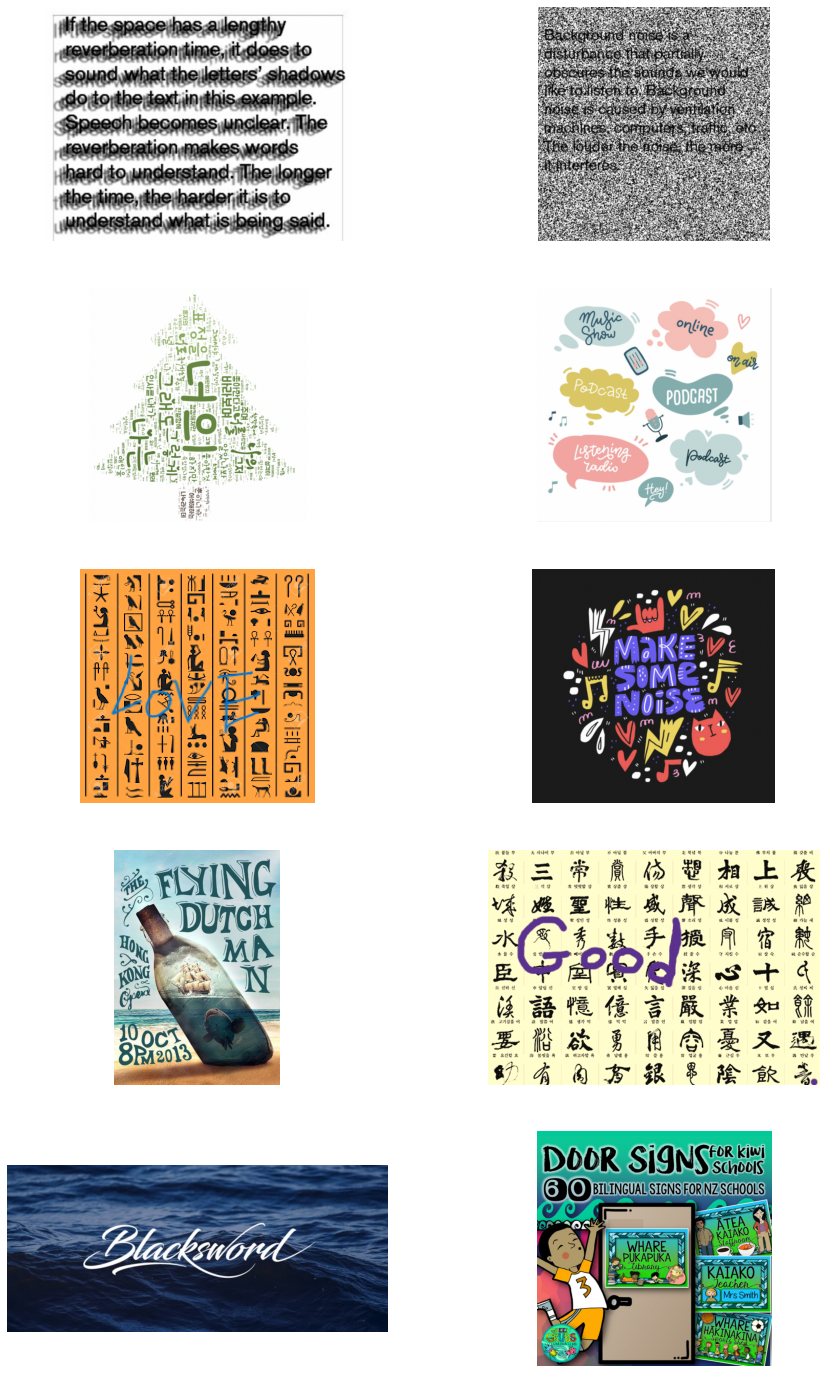

In [95]:
# image 확인 하기 
from PIL import Image
fig, axes =plt.subplots(5,2,figsize=(15,25)) 

for i,ax in enumerate(axes.flatten()):

    image = Image.open(file_list[i])
    print(image.size)
    ax.imshow(image)
    ax.axis('off')

plt.show()

In [96]:
# # 이미지들 확인 해보기  
# import matplotlib.image as img



# for i in file_list:
#     image = img.imread(i)
#     plt.imshow(image)
#     plt.show()

# Step2. keras-ocr, Tesseract로 테스트 진행(Google OCR API는 선택 사항)

# Keras OCR 

In [97]:
file_dir = os.getenv("HOME")+ '/aiffel/OCR_PATH/test/'
file_list = os.listdir(file_dir)

file_list = [os.path.join(file_dir,file_list[i]) for i in range(len(file_list))]
file_list.sort()
del file_list[0]
file_list

['/aiffel/aiffel/OCR_PATH/test/1.png',
 '/aiffel/aiffel/OCR_PATH/test/12.png',
 '/aiffel/aiffel/OCR_PATH/test/14.png',
 '/aiffel/aiffel/OCR_PATH/test/15.png',
 '/aiffel/aiffel/OCR_PATH/test/3.png',
 '/aiffel/aiffel/OCR_PATH/test/4.png']

In [98]:
# keras-ocr이 detector과 recognizer를 위한 모델을 자동으로 다운로드받게 됩니다. 
pipeline = keras_ocr.pipeline.Pipeline()

Looking for /aiffel/.keras-ocr/craft_mlt_25k.h5
Looking for /aiffel/.keras-ocr/crnn_kurapan.h5


In [99]:
images = [keras_ocr.tools.read(file) for file in file_list]

In [100]:
#images=[]
#images = [keras_ocr.tools.read(file) for file in file_list]
prediction_groups = [pipeline.recognize([file]) for file in file_list]

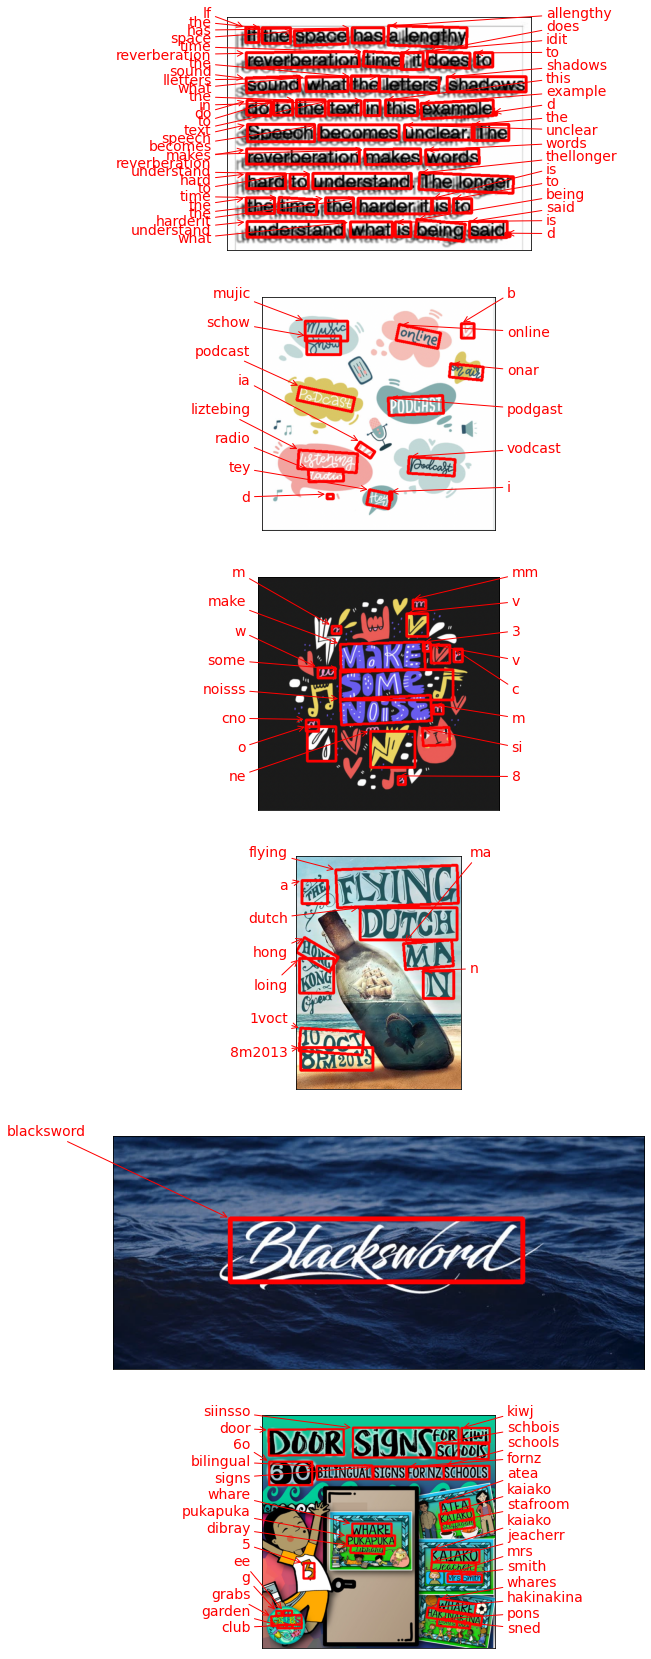

In [101]:
# Plot the predictions
fig, axs = plt.subplots(nrows=len(images), figsize=(30, 30))
for idx, ax in enumerate(axs):
    keras_ocr.tools.drawAnnotations(image=images[idx], 
                                    predictions=prediction_groups[idx][0], ax=ax)

In [102]:
# ocr한 결과 글자의 array dict 가져 온다 
keras_ocr_dict = {}
for idx, img_path in enumerate(file_list):
    keras_ocr_dict[img_path] = prediction_groups[idx][0]

In [103]:
keras_ocr_dict

{'/aiffel/aiffel/OCR_PATH/test/1.png': [('lf',
   array([[44., 24.],
          [75., 24.],
          [75., 60.],
          [44., 60.]], dtype=float32)),
  ('the',
   array([[ 83.,  25.],
          [150.,  25.],
          [150.,  62.],
          [ 83.,  62.]], dtype=float32)),
  ('has',
   array([[296.,  25.],
          [371.,  25.],
          [371.,  61.],
          [296.,  61.]], dtype=float32)),
  ('allengthy',
   array([[382.6115 ,  20.12651],
          [568.89667,  25.85836],
          [567.4604 ,  72.53725],
          [381.17523,  66.8054 ]], dtype=float32)),
  ('space',
   array([[159.42923 ,  32.880295],
          [285.76938 ,  29.465698],
          [286.69565 ,  63.73796 ],
          [160.3555  ,  67.15256 ]], dtype=float32)),
  ('reverberation',
   array([[ 45.771244,  84.68894 ],
          [312.84668 ,  82.36654 ],
          [313.156   , 117.93777 ],
          [ 46.080566, 120.26017 ]], dtype=float32)),
  ('time',
   array([[324.62048 ,  81.52003 ],
          [417.0531  ,  86

In [104]:
# keras_ocr_dict기반으로 keras ocr이 무엇을 OCR했는지 text로 뽑아 낸다 
keras_ocr_text_list = []
for idx, img_path in enumerate(file_list):
    keras_ocr_text_list.append([idx, list(zip(*keras_ocr_dict[img_path]))[0]])

In [105]:
keras_ocr_text_list

[[0,
  ('lf',
   'the',
   'has',
   'allengthy',
   'space',
   'reverberation',
   'time',
   'does',
   'idit',
   'to',
   'the',
   'sound',
   'what',
   'lletters',
   'shadows',
   'the',
   'this',
   'in',
   'do',
   'to',
   'text',
   'example',
   'd',
   'speech',
   'the',
   'becomes',
   'unclear',
   'reverberation',
   'makes',
   'words',
   'thellonger',
   'hard',
   'understand',
   'to',
   'the',
   'the',
   'time',
   'harderit',
   'is',
   'to',
   'understand',
   'being',
   'said',
   'what',
   'is',
   'd')],
 [1,
  ('mujic',
   'b',
   'online',
   'schow',
   'onar',
   'podcast',
   'podgast',
   'ia',
   'liztebing',
   'vodcast',
   'radio',
   'i',
   'tey',
   'd')],
 [2,
  ('mm',
   'v',
   'm',
   '3',
   'make',
   'v',
   'c',
   'w',
   'some',
   'noisss',
   'm',
   'cno',
   'o',
   'si',
   'ne',
   '8')],
 [3, ('flying', 'a', 'dutch', 'hong', 'ma', 'loing', 'n', '1voct', '8m2013')],
 [4, ('blacksword',)],
 [5,
  ('kiwj',
   'siinsso',

# 테서렉트 사용하기 

In [106]:
import os
import pytesseract
from PIL import Image
from pytesseract import Output
import matplotlib.pyplot as plt

In [107]:
def ocr(image_path='./images/sample.png', output_path='./output'):
    if not os.path.exists(output_path):
        os.mkdir(output_path)
    custom_oem_psm_config = r'--oem 3 --psm 3' #oem, psm mode selection
    image = Image.open(image_path)

    recognized_data = pytesseract.image_to_data(
        image, lang='eng',    # 한국어라면 lang='kor'
        config=custom_oem_psm_config,
        output_type=Output.DICT
    )
    
    top_level = max(recognized_data['level'])
    index = 0
    cropped_image_path_list = []
    for i in range(len(recognized_data['level'])):
        level = recognized_data['level'][i]
    
        if level == top_level:
            left = recognized_data['left'][i]
            top = recognized_data['top'][i]
            width = recognized_data['width'][i]
            height = recognized_data['height'][i]
            
            output_img_path = os.path.join(output_path, f"{str(index).zfill(4)}.png")
            print(output_img_path)
            cropped_image = image.crop((
                left,
                top,
                left+width,
                top+height
            ))
            cropped_image.save(output_img_path)
            cropped_image_path_list.append(output_img_path)
            index += 1
            
    custom_oem_psm_config = r'--oem 3 --psm 7'
    
    for image_path in cropped_image_path_list:
        image = Image.open(image_path)
        recognized_data = pytesseract.image_to_string(
            image, lang='eng',    # 한국어라면 lang='kor'
            config=custom_oem_psm_config,
            output_type=Output.DICT
        )
        print(recognized_data['text'])

aiffel/aiffel/OCR_PATH/test/1.png


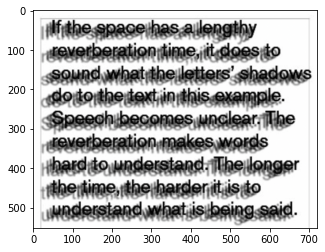

/aiffel/aiffel/OCR_PATH/test/0000.png
———

aiffel/aiffel/OCR_PATH/test/12.png


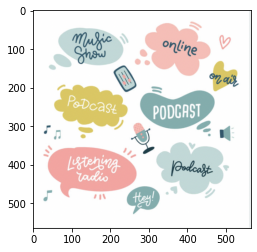

/aiffel/aiffel/OCR_PATH/test/0000.png
/aiffel/aiffel/OCR_PATH/test/0001.png
/aiffel/aiffel/OCR_PATH/test/0002.png
/aiffel/aiffel/OCR_PATH/test/0003.png
/aiffel/aiffel/OCR_PATH/test/0004.png
>



Ss

= f

aiffel/aiffel/OCR_PATH/test/14.png


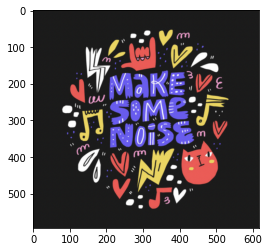

/aiffel/aiffel/OCR_PATH/test/0000.png

aiffel/aiffel/OCR_PATH/test/15.png


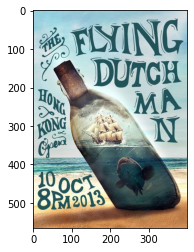

/aiffel/aiffel/OCR_PATH/test/0000.png
/aiffel/aiffel/OCR_PATH/test/0001.png
/aiffel/aiffel/OCR_PATH/test/0002.png
/aiffel/aiffel/OCR_PATH/test/0003.png
/aiffel/aiffel/OCR_PATH/test/0004.png
/aiffel/aiffel/OCR_PATH/test/0005.png
/aiffel/aiffel/OCR_PATH/test/0006.png
4591


7

DUTCH

a



aiffel/aiffel/OCR_PATH/test/3.png


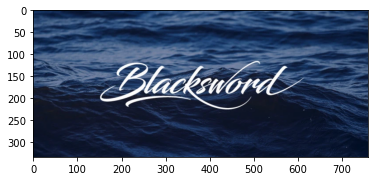

/aiffel/aiffel/OCR_PATH/test/0000.png
Be ge

aiffel/aiffel/OCR_PATH/test/4.png


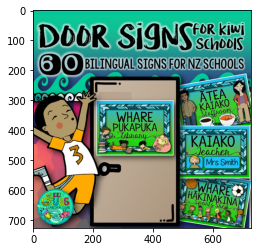

/aiffel/aiffel/OCR_PATH/test/0000.png
/aiffel/aiffel/OCR_PATH/test/0001.png
/aiffel/aiffel/OCR_PATH/test/0002.png
/aiffel/aiffel/OCR_PATH/test/0003.png
/aiffel/aiffel/OCR_PATH/test/0004.png
/aiffel/aiffel/OCR_PATH/test/0005.png
/aiffel/aiffel/OCR_PATH/test/0006.png
/aiffel/aiffel/OCR_PATH/test/0007.png
/aiffel/aiffel/OCR_PATH/test/0008.png
/aiffel/aiffel/OCR_PATH/test/0009.png
/aiffel/aiffel/OCR_PATH/test/0010.png
DOOR


en

BILINGUAL

SIGNS

EOR.NZ

SCHOOLS

. Regt << Rta

SS

Se ee

:



In [108]:
work_dir = os.getenv('HOME')+'/aiffel/OCR_PATH/test/'

for file in file_list:
    file_name = file.split('img')[-1]
    print(file_name[1:])
    img = Image.open(file)
    plt.imshow(img)
    plt.show()
    ocr(file,work_dir)

In [109]:
file_dir = os.getenv("HOME")+ '/aiffel/OCR_PATH/test/'
file_list = os.listdir(file_dir)

file_list = [os.path.join(file_dir,file_list[i]) for i in range(len(file_list))]
file_list.sort()
del file_list[0]
file_list

['/aiffel/aiffel/OCR_PATH/test/0000.png',
 '/aiffel/aiffel/OCR_PATH/test/0001.png',
 '/aiffel/aiffel/OCR_PATH/test/0002.png',
 '/aiffel/aiffel/OCR_PATH/test/0003.png',
 '/aiffel/aiffel/OCR_PATH/test/0004.png',
 '/aiffel/aiffel/OCR_PATH/test/0005.png',
 '/aiffel/aiffel/OCR_PATH/test/0006.png',
 '/aiffel/aiffel/OCR_PATH/test/0007.png',
 '/aiffel/aiffel/OCR_PATH/test/0008.png',
 '/aiffel/aiffel/OCR_PATH/test/0009.png',
 '/aiffel/aiffel/OCR_PATH/test/0010.png',
 '/aiffel/aiffel/OCR_PATH/test/1.png',
 '/aiffel/aiffel/OCR_PATH/test/12.png',
 '/aiffel/aiffel/OCR_PATH/test/14.png',
 '/aiffel/aiffel/OCR_PATH/test/15.png',
 '/aiffel/aiffel/OCR_PATH/test/3.png',
 '/aiffel/aiffel/OCR_PATH/test/4.png']

(236, 80)
(200, 89)
(171, 92)
(161, 68)
(96, 34)
(104, 34)
(134, 34)
(113, 15)
(41, 7)
(152, 20)


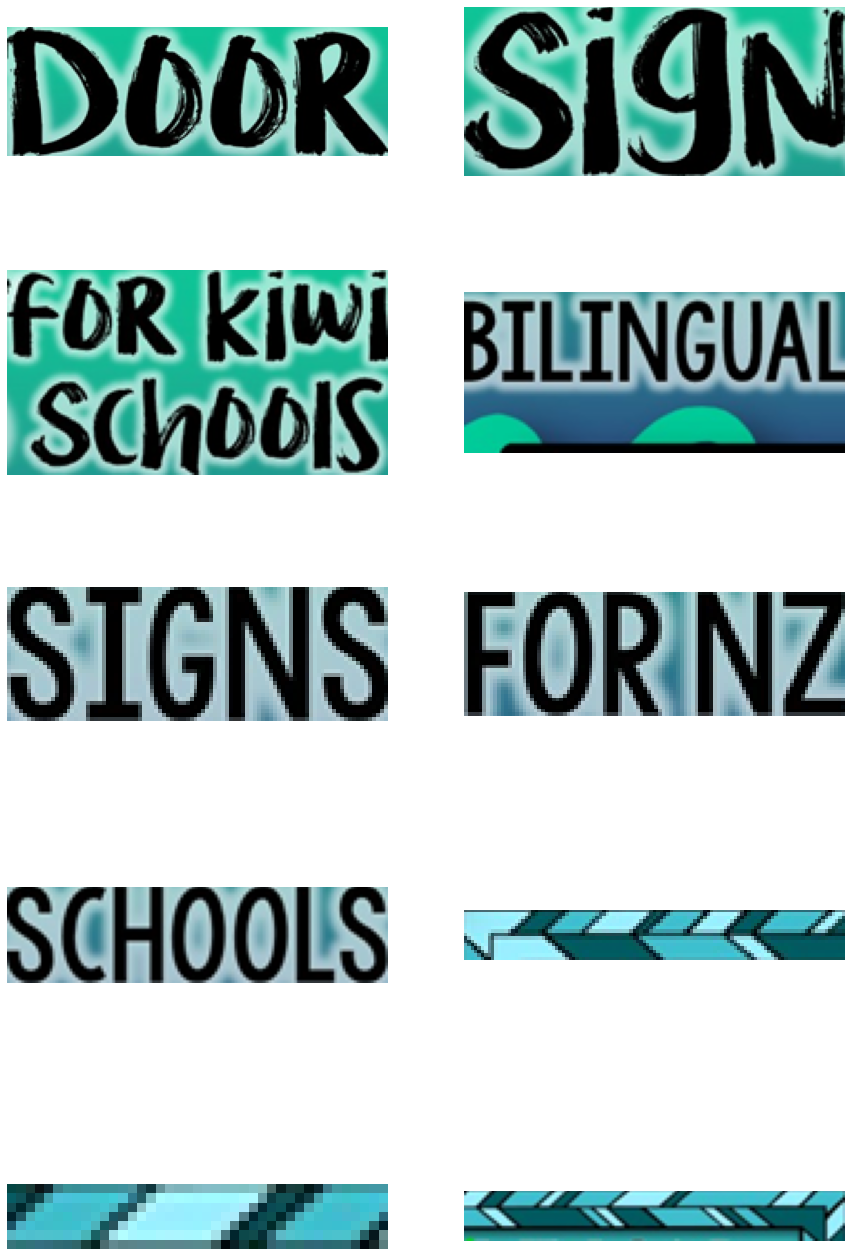

In [110]:
# crop한 결과 이미지 

# image 확인 하기 
from PIL import Image
fig, axes =plt.subplots(5,2,figsize=(15,25)) 

for i,ax in enumerate(axes.flatten()):

    image = Image.open(file_list[i])
    print(image.size)
    ax.imshow(image)
    ax.axis('off')

plt.show()

# 회고 

처음 이미지들을 가지고 OCR해봤는데 일부 이미지에서 알수없는 에러가 발생했다 검색도 해보고 해봤지만 도저히 뭐가 문제인지 몰라서 안되는 이미지는 삭제를 해주고 진행을 하였다 그 결과 원래 시도 하려던 이미지보다 더 적은 이미지밖에 사용할수밖에 없었다. 

keras ocr은 잘 된것 같아 보인다. 실제로 ocr이 잘된것도 있지만 중간중간에 잘못 된 결과도 있음을 확인할수가 있다 텍스트로 한번에 보고 싶어서 텍스트로 한번에 출력한 결과도 확인할수있다. 


테서렉트는 거의 결과가 좋지 못했다. 마지막으로 크롭 된 이미지 출력해보았는데 잘된것도 있지만 엉뚱한 결과도 있다 

원래 실행할 이미지를 다 해보려고 시간 투자 많이 했지만 뭐가 문제인지 잘 모르겠어서 일부 이미지를 삭제하는 방법을 선택하였다  

